In [1]:
import numpy as np
from matplotlib import pyplot as plt  
import seaborn
import sklearn
import pandas as pd


In [3]:
df = pd.read_csv('/bioresponse - bioresponse.csv')

In [4]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.0,0.0,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.0,0.0,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.0,0.0,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.0,0.0,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(3751, 1777)

Thera are 3751 rows and  1777 columns in dataset. 


#1. Here we build models with a tree structure. According to docs tree classifier give predictions in (-1, 1) form. That is why we have to make some modification of true train labels and reverse conversion of test and predicted lables.


In [5]:
Y = df['Activity']
X = df.drop(columns = ['Activity'])

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()


693 from class 1 in test sample
1341 from class 1 in train sample

In [6]:
Y[Y==0] = -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     1
1     1
2     1
3     1
4    -1
5    -1
6     1
7     1
8     1
9    -1
10    1
11   -1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19   -1
Name: Activity, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.33, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [59]:
#Small tree
small_tree = DecisionTreeClassifier(max_depth = 3, max_features = 'auto' )
small_tree = small_tree.fit(X_train, y_train)

In [10]:
y_test[y_test ==-1] = 0

In [60]:
y_pred_small = small_tree.predict(X_test)
y_pred_small_proba = small_tree.predict_proba(X_test)
y_pred_small[y_pred_small == -1] = 0

[0 1 0 ... 0 0 0]


In [64]:
#Deep tree
deep_tree = DecisionTreeClassifier(max_depth = 100 )
deep_tree = deep_tree.fit(X_train, y_train)
y_pred_deep = deep_tree.predict(X_test)
y_pred_deep_proba = deep_tree.predict_proba(X_test)
y_pred_deep[y_pred_deep == -1] = 0


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Random forest on small trees
rf_small = RandomForestClassifier(n_estimators = 50, max_depth=10, random_state=17)
rf_small = rf_small.fit(X_train, y_train)
y_rf_small = rf_small.predict(X_test)
y_rf_small_proba = rf_small.predict_proba(X_test)
y_rf_small[y_rf_small == -1] = 0


In [52]:
# Random forest on deep trees
rf_deep = RandomForestClassifier(n_estimators = 50, max_depth=1000, random_state=17)
rf_deep = rf_deep.fit(X_train, y_train)
y_rf_deep = rf_deep.predict(X_test)
y_rf_deep_proba = rf_deep.predict_proba(X_test)
y_rf_deep[y_rf_deep == -1] = 0

#2. Here we calculate values of classification metrics

In [12]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss

In [67]:
print ('Precision of small decision tree = ', precision_score(y_test, y_pred_small ) )
print ('Recall of small decision tree = ', recall_score(y_test, y_pred_small ) )
print ('Accuracy of small decision tree = ', accuracy_score(y_test, y_pred_small ) )
print ('F1-score of small decision tree = ', f1_score(y_test, y_pred_small ) )
print ('Log-loss of small decision tree = ', log_loss(y_test, y_pred_small ) )

Precision of small decision tree =  0.7071547420965059
Recall of small decision tree =  0.6132756132756133
Accuracy of small decision tree =  0.6413570274636511
F1-score of small decision tree =  0.6568778979907264
Log-loss of small decision tree =  12.387203108633326


In [68]:
print ('Precision of a deep decision tree = ', precision_score(y_test, y_pred_deep ) )
print ('Recall of a deep decision tree = ', recall_score(y_test, y_pred_deep ) )
print ('Accuracy of a deep decision tree = ', accuracy_score(y_test, y_pred_deep ) )
print ('F1-score of a deep decision tree = ', f1_score(y_test, y_pred_deep ) )
print ('Log-loss of a deep decision tree = ', log_loss(y_test, y_pred_deep ) )

Precision of a deep decision tree =  0.7488584474885844
Recall of a deep decision tree =  0.70995670995671
Accuracy of a deep decision tree =  0.7043618739903069
F1-score of a deep decision tree =  0.7288888888888889
Log-loss of a deep decision tree =  10.211085697991352


In [69]:
print ('Precision of a rand_for on small trees decision tree = ', precision_score(y_test, y_rf_small ) )
print ('Recall of a rand_for on small trees = ', recall_score(y_test, y_rf_small ) )
print ('Accuracy of a rand_for on small trees = ', accuracy_score(y_test, y_rf_small ) )
print ('F1-score of a rand_for on small trees = ', f1_score(y_test, y_rf_small ) )
print ('Log-loss of a rand_for on small trees = ', log_loss(y_test, y_rf_small ) )

Precision of a rand_for on small trees decision tree =  0.8120411160058737
Recall of a rand_for on small trees =  0.797979797979798
Accuracy of a rand_for on small trees =  0.7835218093699515
F1-score of a rand_for on small trees =  0.8049490538573509
Log-loss of a rand_for on small trees =  7.476974492978295


In [70]:
print ('Precision of a rand_for on deep trees decision tree = ', precision_score(y_test, y_rf_deep ) )
print ('Recall of a rand_for on deep trees = ', recall_score(y_test, y_rf_deep ) )
print ('Accuracy of a rand_for on deep trees = ', accuracy_score(y_test, y_rf_deep ) )
print ('F1-score of a rand_for on deep trees = ', f1_score(y_test, y_rf_deep ) )
print ('Log-loss of a rand_for on deep trees = ', log_loss(y_test, y_rf_deep ) )

Precision of a rand_for on deep trees decision tree =  0.8229166666666666
Recall of a rand_for on deep trees =  0.797979797979798
Accuracy of a rand_for on deep trees =  0.7907915993537964
F1-score of a rand_for on deep trees =  0.8102564102564104
Log-loss of a rand_for on deep trees =  7.2258790293829245


#3. Here we build graphics

In [21]:
from sklearn.metrics import precision_recall_curve

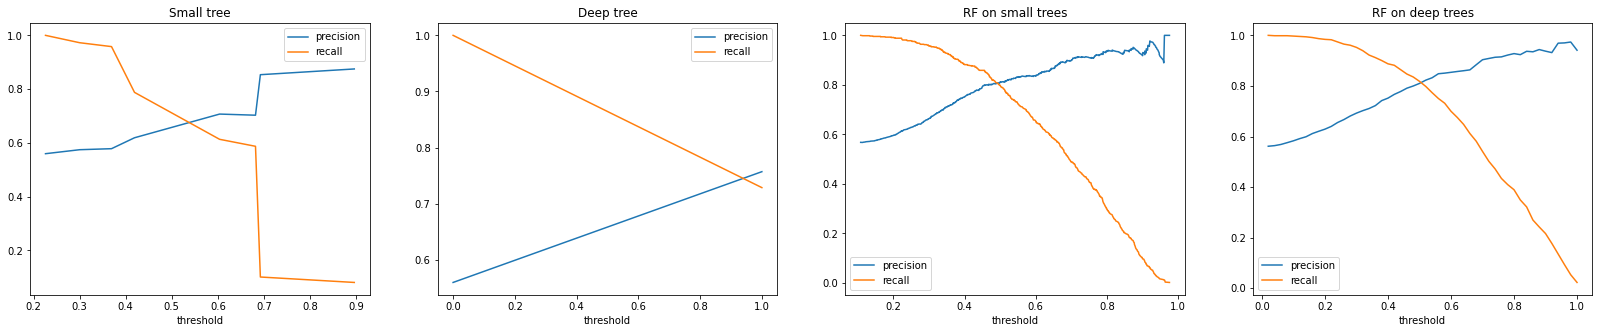

In [63]:
precs = []
recs = []
threshs = []
labels = ["Small tree", "Deep tree", "RF on small trees", "RF on deep trees"]
for actual, predicted in zip([y_test, y_test, y_test, y_test], 
                                    [y_pred_small_proba[:,1], y_pred_deep_proba[:,1], y_rf_small_proba[:,1], y_rf_deep_proba[:,1]]):
    prec, rec, thresh = precision_recall_curve(actual, predicted)
    precs.append(prec)
    recs.append(rec)
    threshs.append(thresh)
plt.figure(figsize=(28, 5))
for i in range(4):
    ax = plt.subplot(1, 4, i+1)
    plt.plot(threshs[i], precs[i][:-1], label="precision")
    plt.plot(threshs[i], recs[i][:-1], label="recall")
    plt.xlabel("threshold")
    ax.set_title(labels[i])
    plt.legend()

In [45]:
from sklearn.metrics import roc_curve

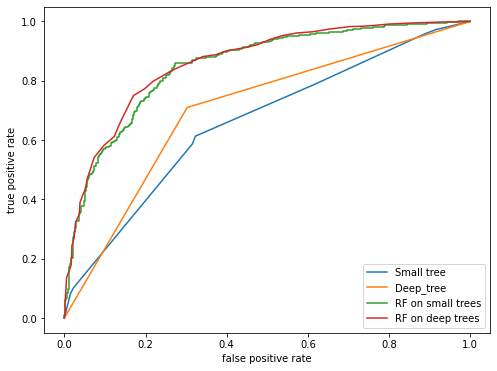

In [77]:
plt.figure(figsize=(8,6))
for actual, predicted, descr in zip([y_test, y_test, y_test, y_test], 
                                    [y_pred_small_proba[:,1], y_pred_deep_proba[:,1], y_rf_small_proba[:,1], y_rf_deep_proba[:,1]],
                                    ["Small tree", "Deep_tree", "RF on small trees", "RF on deep trees"]):
    fpr, tpr, thr = roc_curve(actual, predicted)
    plt.plot(fpr, tpr, label=descr)
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc=4)

#4. As we can see a random forest on small trees shows the highest values of metrics, therefore we will try to increase recall for this model. As far as we need recall >=0.95 it would be better to take thresholf in [0.2 ; 0.25]


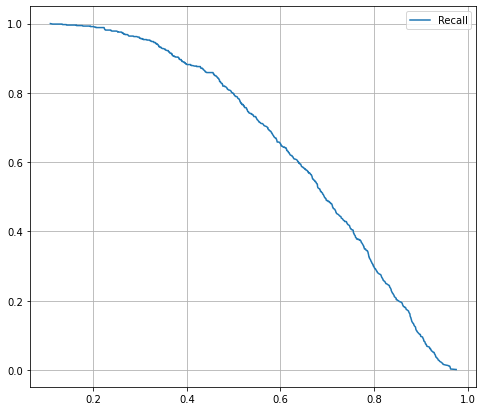

In [75]:
prec, rec, thres = precision_recall_curve(y_test, y_rf_small_proba[:, 1])
plt.figure(figsize=(8,7))
plt.grid()
plt.plot(thres, rec[: -1], label = "Recall")
plt.legend()

In [76]:
avoid_FN = np.where(y_rf_small_proba[:,1] >=0.25 , 1, 0)
print ('Precision of a rand_for on deep trees decision tree = ', precision_score(y_test, avoid_FN ) )
print ('Recall of a rand_for on deep trees = ', recall_score(y_test, avoid_FN ) )
print ('Accuracy of a rand_for on deep trees = ', accuracy_score(y_test, avoid_FN ) )
print ('F1-score of a rand_for on deep trees = ', f1_score(y_test, avoid_FN ) )
print ('Log-loss of a rand_for on deep trees = ', log_loss(y_test, avoid_FN ) )


Precision of a rand_for on deep trees decision tree =  0.6280148423005566
Recall of a rand_for on deep trees =  0.976911976911977
Accuracy of a rand_for on deep trees =  0.6631663974151858
F1-score of a rand_for on deep trees =  0.7645398080180688
Log-loss of a rand_for on deep trees =  11.634079479198112


So we have reached recall >=0.95. But, in my opinion, threshold=0.25 is too low to lable object as 1. But everything depends on topic and data specific